<a href="https://colab.research.google.com/github/skyish21/FashionGAN-Designer/blob/main/Fashion_GAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion GAN Model**

This project implements a Generative Adversarial Network (GAN) to generate realistic images of clothing items based on the Fashion-MNIST dataset. A convolutional neural network-based generator is trained to produce 28×28 grayscale images that resemble real clothing samples, while a discriminator learns to distinguish between real and generated images.

1. **Dataset**: Load and preprocess Fashion-MNIST using tfds; normalize, shuffle, batch, and prefetch.

2. **Generator**: Takes random noise → outputs 28×28×1 image via Dense + Conv2DTranspose.

3. **Discriminator**: CNN that takes an image → outputs a real/fake score (binary classification).

4. **Training Data**: Real images come from tfds, fake images from generator output.

5. **GAN Losses**:

- Discriminator: Learns to distinguish real (label 1) vs fake (label 0) images.

- Generator: Tries to fool the discriminator into predicting fake images as real (label 1).

6. **Noise Vector**: Random normal vector of shape (latent_dim,) used as generator input.

7. **Training Loop**: Custom train_step() with tf.GradientTape for manual generator & discriminator updates.

8. **Label Trick**: Use tf.ones_like() for real labels and tf.zeros_like() for fake labels.

9. **Noise Injection**: Optionally add small noise to labels for stability.

10. **Callback**: GANMonitor saves sample generated images at the end of each epoch.

11. **Model Subclassing**: FashionGAN inherits from tf.keras.Model for full training control.

12. **Image Shape**: All generated and real images must be reshaped to (28, 28, 1).

13. **Latent Dim**: Typical dimension for noise vector is 100–128.

14. **Compile Step**: Define optimizers and loss functions for generator and discriminator.

15. **Fit Function**: Train model using .fit(dataset, epochs, callbacks).

16. **Metrics**: Track d_loss and g_loss for GAN performance.

17. **Goal**: Generator produces realistic clothing images indistinguishable from Fashion-MNIST.

18. **Save Images**: Save generated outputs using array_to_img() and PIL.Image.save().

19. **Result**: After training, generator creates new clothing-style images from pure noise.




## **Set up Environment**

In [2]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


In [3]:
# Bringing in Tensorflow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True) # limited memory growth, control gpu usage

TensorFlow version: 2.18.0


In [4]:
for gpu in gpus:
  print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
# Dataset for fashion mnsit
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

## Dataset Loading

In [6]:
# use tensorflow dataset apis to bring data source
# specify only training set
# pipeline with set of repeatable calls to bring data
ds = tfds.load("fashion_mnist", split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.0AZZ0F_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.0AZZ0F_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
type(ds)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [8]:
# connection to pipeline
ds.as_numpy_iterator().next() # images and labels

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [9]:
# ds.as_numpy_iterator().next()['image']
# ds.as_numpy_iterator().next()['label']

## Visualize the dataset

In [10]:
# data transformation
import numpy as np

The iterator gets batches (or single elements if not batched) from the dataset.

It converts TensorFlow tensors to NumPy arrays.

On calling .next() (or next()), it returns one sample:

In [11]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [12]:
# getting data out of pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [13]:
# next bring new batch or dataset everytime we load

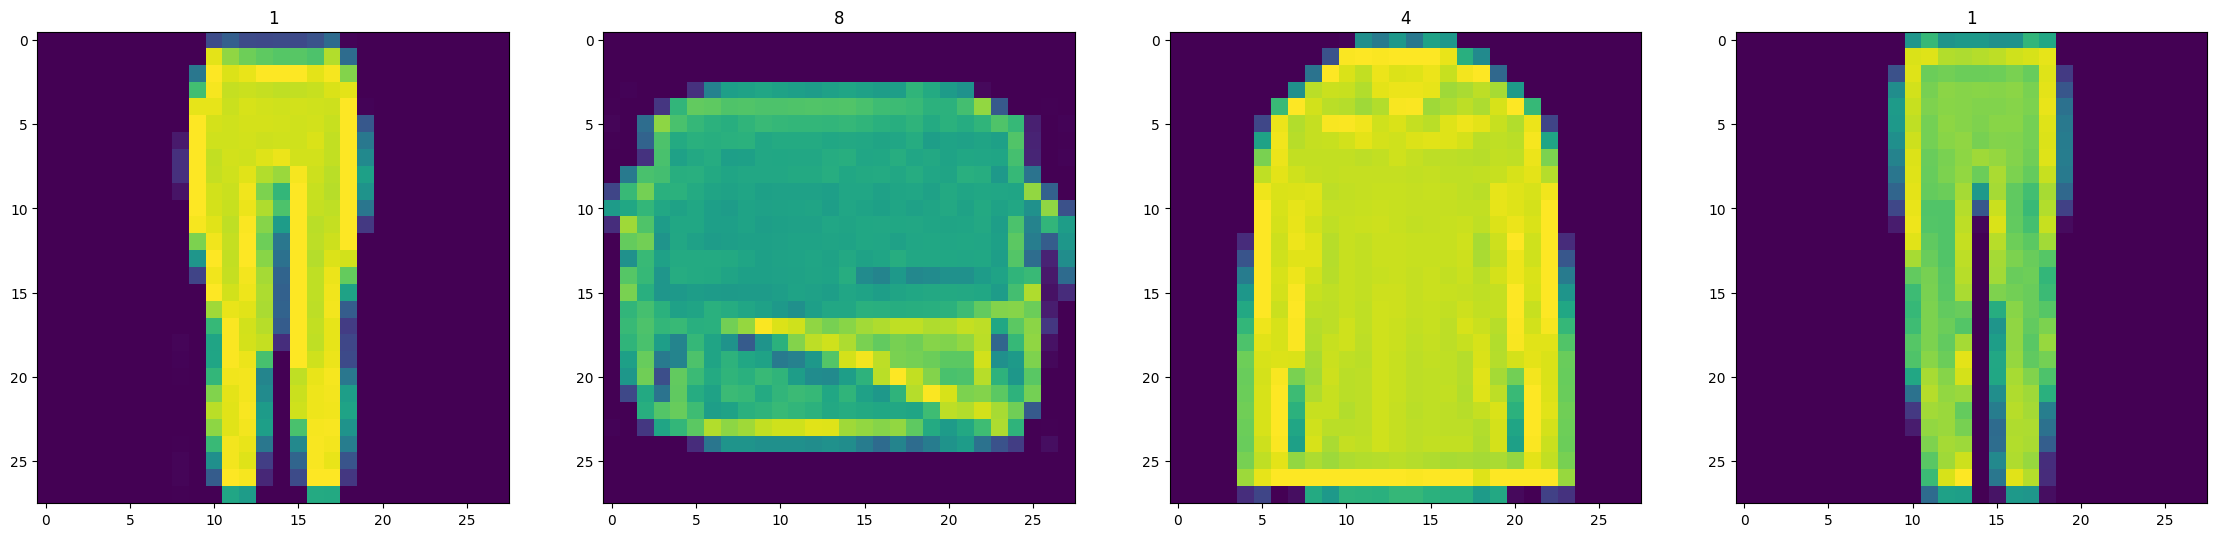

In [14]:
# setup subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(28,28))
# loop 4 times and get image
for i in range(4):
  # get one sample
  # .next() allows to get different set of images
  batch = dataiterator.next()
  # plot axis to visualize
  # show condensed image
  ax[i].imshow(np.squeeze(batch['image']))
  # printing the image label as the plot title
  ax[i].title.set_text(batch['label'])

In [15]:
ds.as_numpy_iterator().next()['image'].shape # image of dimensions 28 x 28 grayscale

(28, 28, 1)

## Data Processing and Scaling

In [16]:
# Scale and return images only (exclude label)

# take in data from tfds pipeline
def scale_image(data):
  image = data['image']   # extract the image only (not label)
  return image / 255      # scale the image

- map() transforms each data sample,
- cache() stores the dataset after first load,
- shuffle() randomizes sample order,
- batch() groups samples for processing,
- prefetch() overlaps data loading with model training.

In [17]:
# Reload the dataset
ds = tfds.load("fashion_mnist", split='train')
# Preprocessing images
ds = ds.map(scale_image)
# Cache the dataset for batch
ds = ds.cache()
# Shuffled dataset
ds = ds.shuffle(60000)
# Create batches pf 128 images per sample
ds = ds.batch(128)
# Reduce likelihood of bottlenecking
ds = ds.prefetch(64)

In [18]:
ds.as_numpy_iterator().next().shape # 128 images of 28 x 28 dimensions and grayscale

(128, 28, 28, 1)

## Build our NN

In [19]:
# import dependencies

# sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
# layers for NN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### Build Generator

In [20]:
def build_generator():
  model = Sequential()


  model.add(Dense(7*7*128, input_dim=128))   # 128 images of 7x7 dimensions 128 layers
  model.add(LeakyReLU(0.2))                  # Activation function
  model.add(Reshape((7,7,128)))              # Reshape into 7x7x128


  # Upsampling the block 1
  # Double the spacial quality -> 14 x 14 x 128
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling the block 2
  # Double the spacial quality -> 28 x 28 x 128
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolution block 1
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolution block 2
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to get 1 channel
  model.add(Conv2D(1, 4, padding='same', activation = 'sigmoid'))

  return model

In [21]:
generator = build_generator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

Generate new fashion

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


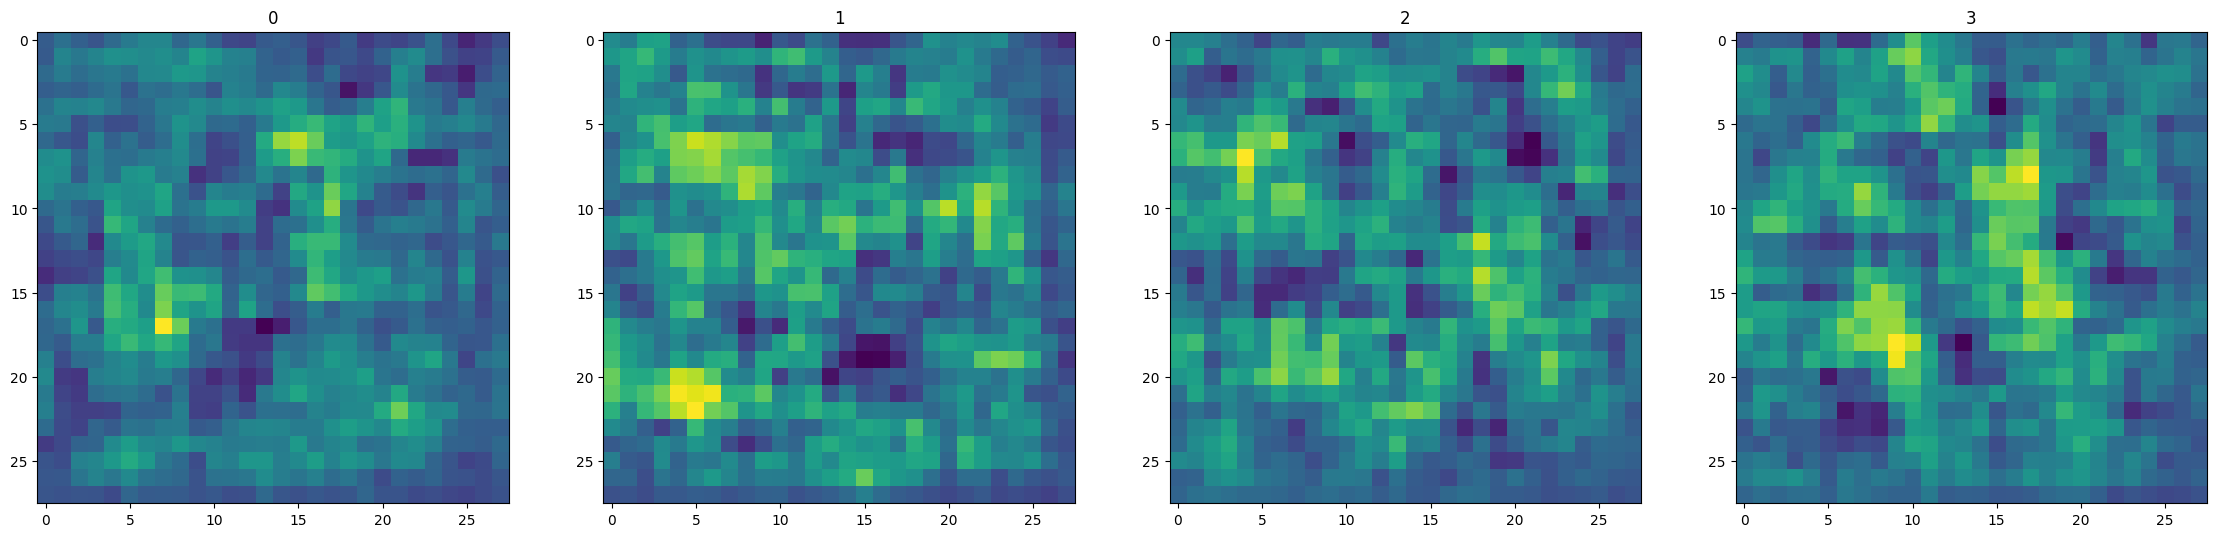

In [23]:
img = generator.predict(np.random.randn(4,128,1))
# Visualize images generated by generator

# setup subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(28,28))
# loop 4 times and get one index, image
for i, img in enumerate(img):
  # get one sample
  # .next() allows to get different set of images
  batch = dataiterator.next()
  # plot axis to visualize
  # show condensed image
  ax[i].imshow(np.squeeze(img))
  # printing the image label as the plot title
  ax[i].title.set_text(i)

### Build Discriminator

In [24]:
def build_disc():
  model = Sequential()

  # Conv Block 1
  model.add(Conv2D(32, 5, input_shape=(28,28,1)))  # (padding = same) not defined, i.e, condense images
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))                          # applies regularization

  # Conv Block 2
  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Conv Block 3
  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Conv Block 4
  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to Dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))

  return model

In [25]:
discriminator = build_disc()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
img = generator.predict(np.random.randn(4,128,1)) # 4 images to generate, passing in 128 images for generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [28]:
img.shape # single image

(4, 28, 28, 1)

In [29]:
discriminator.predict(img) # passing 4 images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


array([[0.5032816],
       [0.5031246],
       [0.5031489],
       [0.5031292]], dtype=float32)

In [30]:
# To pass in single image
img1 = img[0]
discriminator.predict(np.expand_dims(img1,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


array([[0.5032816]], dtype=float32)

## Construct Training Loop

In [31]:
# Set up losses and optimizers

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
# Create Instances
g_opt = Adam(learning_rate=0.0001)   # for generator
g_loss = BinaryCrossentropy()
d_opt = Adam(learning_rate=0.00001)  # for discriminator (so it doesn't learn faster than generator)
d_loss = BinaryCrossentropy()

In [33]:
# Build Subclassed Model

# Importing base model class to subclass our training step
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [41]:
class FashionGAN(Model):

  # args, kwargs allows to use base functionality of base model
  def __init__(self, generator, discriminator, *args, **kwargs):
    # pass through args and kwargs to base class
    # can pass additional arguments
    super().__init__(*args, **kwargs)

    # Create attributes for gen and disc
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    # Create attributes for all
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):

    # get the data
    real_images = batch
    # passing random values to generator to generate values/images
    # making predictions
    fake_images = self.generator(tf.random.normal((128,128,1)), training = False)

    # Training discriminator
    # allows to caluclate all the operations by DNN
    with tf.GradientTape() as d_tape:

        # pass real and fake images
        yhat_real = self.discriminator(real_images, training = True)    # Discriminator's prediction on real images (close to 1)
        yhat_fake = self.discriminator(fake_images, training = True)    # Discriminator's prediction on fake images (close to 0)
        yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)       # Predictions

        # create labels for both
        # define labels (1-> real, 0-> fake)
        # creating a tensor of 0s and 1s with the same shape as the predictions
        y_realfake = tf.concat([tf.ones_like(yhat_real), tf.zeros_like(yhat_fake)], axis=0)   # actual

        # add noise to Actual outputs
        noise_real = -0.15*tf.random.uniform(tf.shape(yhat_real)) # Makes a 1 label more "uncertain" (1->0.85)
        noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))  # Makes a 0 label more "uncertain" (0->0.15)
        y_realfake += tf.concat([noise_real, noise_fake], axis=0)

        # calculate loss
        total_d_loss= self.d_loss(y_realfake, yhat_realfake)

    # Apply backpropagation - nn learn
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)    # gradient calculation
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))   # apply gradient using optimizer



    # Training Generator
    # allows to caluclate all the operations by DNN
    with tf.GradientTape() as g_tape:

      # generate new images
      gen_imgs = self.generator(tf.random.normal((128,128,1)), training = True)

      # create predicted labels (1->real,0->fake)
      # expected disc to give 0 labels
      predicted_labels = self.discriminator(gen_imgs, training = False)

      # create Actual/Real labels
      # confuse disc by saying that the real labels are all 1s (but are generated,i.e., fake=0s)
      real_labels = tf.ones_like(predicted_labels)

      # calculate loss
      # reward generator of disc predicts fake img as real
      total_g_loss = self.g_loss(real_labels, predicted_labels)

    # Apply backpropagation
    ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)   # gradient calculation
    self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))  # apply gradient using optimizer


    return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [42]:
# Create instance of Subclassed Model
fashgan = FashionGAN(generator, discriminator)

In [43]:
# Model Compile
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## Build Callback

In [38]:
# folder navigation
import os
from tensorflow.keras.utils import array_to_img
# create own custom callback on epoch end
from tensorflow.keras.callbacks import Callback

In [39]:
# Allow to save examples of generated images

# Laten dim = random var passed to gen to generate images
class GANMonitor(Callback):
  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim

  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.normal((self.num_img, self.latent_dim,1))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images.numpy()
    for i in range(self.num_img):
      img = array_to_img(generated_images[i])
      img.save(os.path.join("images",f"generated_img_{epoch}_{i}.png"))

## Train

**Discriminator Loss (d_loss)**
- Measures how well the discriminator separates real from fake.

- Ideal early on: ~0.5 to 0.7 (uncertainty).

- If it drops too low → D is too confident.

- If it’s always high → D is failing.

**Generator Loss (g_loss)**
- Measures how well the generator fools the discriminator.

- Higher values mean the generator is struggling.

- You want g_loss to gradually decrease, but not too fast (GAN balance matters).

In [44]:
hist = fashgan.fit(ds, epochs=20, callbacks=[GANMonitor()])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 105s 170ms/step - d_loss: 0.5865 - g_loss: 0.7363
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - d_loss: 0.6028 - g_loss: 1.5871
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - d_loss: 0.4526 - g_loss: 1.6456
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 141ms/step - d_loss: 0.5965 - g_loss: 0.5061
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - d_loss: 0.7149 - g_loss: 0.4082
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - d_loss: 0.6968 - g_loss: 0.6029
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - d_loss: 0.6938 - g_loss: 0.6191
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - d_loss: 0.6945 - g_loss: 0.6283
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - d_loss: 0.6714 - g_loss: 0.6187
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - d_loss: 0.6946 - g_loss: 0.6103
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 143ms/step - d_loss: 0.6952 - g_loss: 0.6353
Epoch 12/20
469/46

## Review Performance

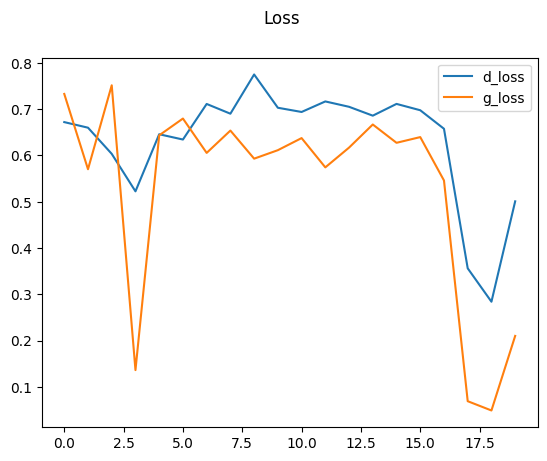

In [58]:
plt.suptitle("Loss")
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

## Test Out Generator

In [51]:
# Generate images
imgs = generator.predict(tf.random.normal((16,128,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


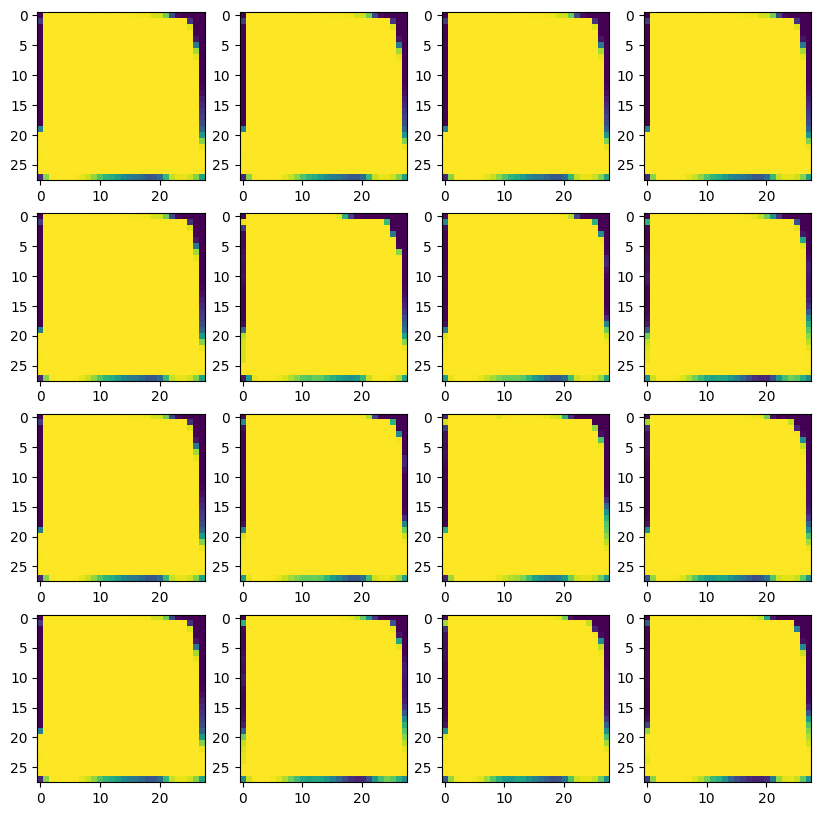

In [56]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
# loop
for i in range(4):
  for j in range(4):
    ax[i][j].imshow(imgs[(i*1)*(j*1)-1])

In [ ]:
# save the model
#generator.save("")
#discriminator.save("")